<a href="https://colab.research.google.com/github/sree268/Machine-Learning/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding gradient descent

Starting with a simple problem, we are going to understand working of gradient descent in this notebook.  
  
Take one dimensional problem, we're planning to build a house between two tower's which supplies power to the house. We decided to have power supply from both the towers so that we can have a back up even one gets broke down. The power cabel costs twice the length of it.    

So the goal is to find a point to build a house, such that cost of the cable will be minimum.

In [1]:
# Import required modules
from sympy import *              #A library that provides symbolic differentiation
from sympy.utilities.lambdify import lambdify
from jax import grad             #A function to perform automatic differentiation
import jax.numpy as jnp          #A wrapped version of NumPy to use JAX premitives
import numpy as np               #A library to deal with math
import matplotlib.pyplot as plt  #A library for programming plot generation
import pandas as pd

%matplotlib inline

Say house and towers align in a straight line, X-axis

In [2]:
a = 1         #Point of tower a in the straight line
b = 6         #Point of tower b in the straight line
x = None      #Point of the house

In [3]:
#Function for plotting positions
def plot_points(x_points, y_points=None):
  if y_points==None:
    y_points = np.zeros(len(x_points))

  plt.plot(x_points[:-1], y_points[:-1], "bo",label="Towers")
  plt.plot(x_points[-1], y_points[-1], "go", label="House")
  plt.legend()

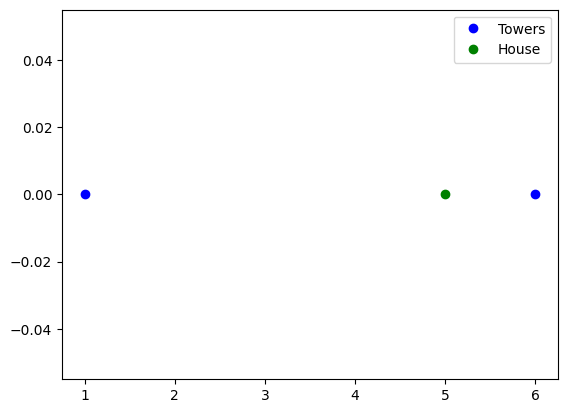

In [4]:
plot_points(np.array([a,b,5]))

## Cost of cable
Distance can be found by subtracting tower location from house location, and sum of the squares of both distances gives the cost.  
Let's have a look to symbolic representation of cost function.

In [5]:
#defining symbols
x = symbols('x')
cost = (x - a)**2 + (x - b)**2
cost

(x - 6)**2 + (x - 1)**2

In [6]:
#creating a function to calculate cost's for different x values
f_cost = lambdify(x, cost, "numpy")

In [7]:
print(f"Cost of cable, if house at point {1} : {f_cost(1)}")
print(f"Cost of cable, if house at point {5} : {f_cost(5)}")
print(f"Cost of cable, if house at point {9} : {f_cost(9)}")

Cost of cable, if house at point 1 : 25
Cost of cable, if house at point 5 : 17
Cost of cable, if house at point 9 : 73


In [8]:
#Function used for plotting
def plot_f1_and_f2(f1, f2=None, x_min=-1, x_max=8, label1="f(x)", label2="f'(x)"):
    x = np.linspace(x_min, x_max,100)

    # Setting the axes at the centre.
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.plot(x, f1(x), 'r', label=label1)
    if not f2 is None:
        # If f2 is an array, it is passed as it is to be plotted as unlinked points.
        # If f2 is a function, f2(x) needs to be passed to plot it.
        if isinstance(f2, np.ndarray):
            plt.plot(x, f2, 'bo', markersize=3, label=label2,)
        else:
            plt.plot(x, f2(x), 'b', label=label2)


    plt.xlabel("Point of house")
    plt.ylabel("Cost of cabel")
    plt.legend()

    plt.show()

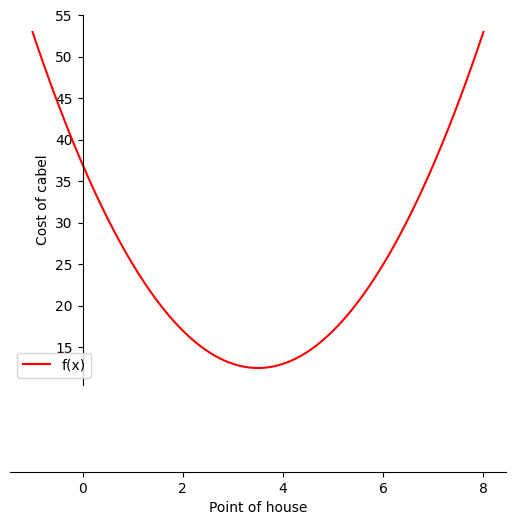

In [9]:
#let's visually look at the cost of cable for different house location's
plot_f1_and_f2(f_cost)

Cost of cable will be minimum at point some where in between 2 and 4. But how to find the exact point?  
Here come's the differentiation.
## Differentiation
We know that differentiation is all about rate of change at a particular instance. And it is equal to the slope of the graph at that point. If there is a function $f(x)$, then it's derivative is $f'(x)$ which gives slope for $f(x)$ at  point $x$. Slope can be positive, negative or even zero. When function increases respective with $x$ then slope is positive, if function decreases respective with increase of $x$ then slope is negative, and there is a point where line of slope will be parallel to x-axis which means zero slope. The slope will be zero at points where function reaches it's maximum or minimum.  
All we want is to find the point where function is minimum. Hence we want to find value of $x$ where $f'(x)=0$  
Let's calculate the derivative of our cost function $f(x)=(x-a)^2+(x-b)^2$

In [10]:
#Derivative of f_cost
cost_diff = diff((x-a)**2+(x-b)**2, x)
cost_diff

4*x - 14

In [11]:
#solving for f'(x)=0
x_f = solve(cost_diff, x)
x_f

[7/2]

Hence we can build a house at point 3.5

In [12]:
dfdx_cost = lambdify(x, cost_diff, "numpy")

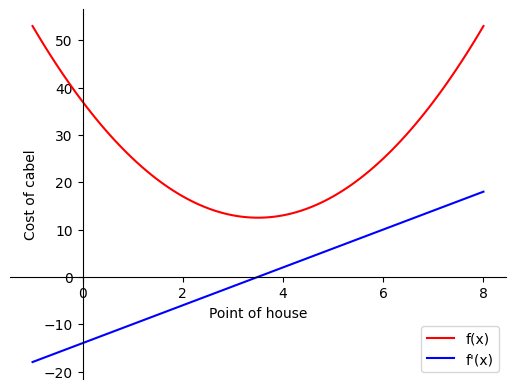

In [13]:
plot_f1_and_f2(f_cost, dfdx_cost)

In [14]:
#calculating minimum cost for cable
min_cost = cost.evalf(subs={x:x_f[0]})
min_cost

12.5000000000000

We can find minimum cost using same methods even if we add more towers.

In [15]:
c = 10
cost = (a-x)**2 + (b-x)**2 + (c-x)**2
cost_diff = diff(cost,x)
solve(cost_diff,x)

[17/3]

## 2D Problem
Let move further, this time we have our towers in a two dimensional plane and we are planning to construct a main line passing through the towers. Each tower is connected to the main line by means of cable's in vertical direction. Same here the cost is double the distance. The problem statement is to find the path of main line, such that the cost of cable for connecting the towers to the main line will be minimum.

In [16]:
#Defining points of towers in a xy plane

p = np.array([1,2])
q = np.array([2,5])
r = np.array([4,4])

In [17]:
#Main line

#defining symbols
m, x, b = symbols("m x b")
y = m * x + b
y

b + m*x

By using our intuition, we predicted our line looks like below graph

In [18]:
def plot_2d_plane(f1,points, x_min = -1, x_max = 10, label = "f(x)"):
  x = np.linspace(x_min, x_max,100)
  plt.plot(x, f1(x), 'r', label=label)
  x = [point[0] for point in points]
  y = [point[1] for point in points]
  plt.plot(x,y,"bo")
  for x, y in points:
    plt.vlines(x = x, ymin = y, ymax = f1(x), colors = 'blue')
    plt.text(x, y+0.5, '({}, {})'.format(x, y))

  plt.legend()

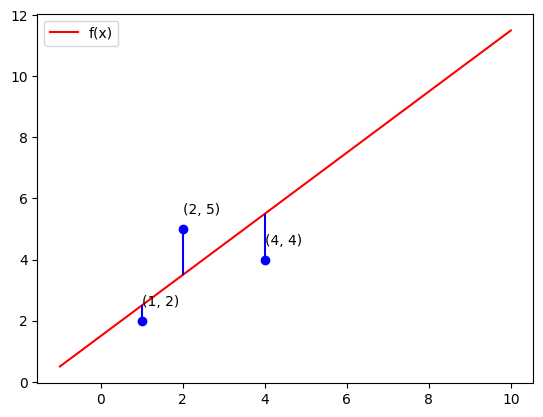

In [19]:
m, b = 1, 1.5
y = m * x + b
y_func = lambdify(x, y, "numpy")
towers = (p,q,r)
plot_2d_plane(y_func, towers)

In [20]:
#calculate the cost

cost = (p[1] - m*p[0] - b)**2 + (q[1] - m*q[0] - b)**2 + (r[1] - m*r[0] - b)**2
cost

4.75

In [21]:
# Minimize the cost
m,b = symbols("m b")
cost = (p[1] - m*p[0] - b)**2 + (q[1] - m*q[0] - b)**2 + (r[1] - m*r[0] - b)**2
cost

(-b - 4*m + 4)**2 + (-b - 2*m + 5)**2 + (-b - m + 2)**2

In [22]:
#visualize the cost function
def plot_3d(f):
  x = np.linspace(-10,10,100)
  y = x.copy()
  z = np.array([[f(i,j) for j in y] for i in x])
  fig = plt.figure()
  ax = plt.axes(projection='3d')

  ax.plot_surface(x, y, z)
  plt.show()


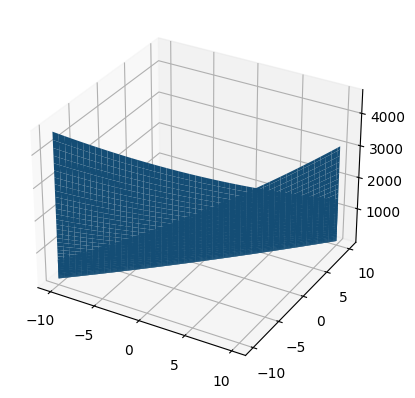

In [23]:
f_cost = lambdify((m,b), cost, "numpy")
plot_3d(f_cost)

Since cost is related to two variables, so we use partial differentiation, which is differentiating with respective of each variable.

In [24]:
#Differentiating with respect of m
dfdm = diff(cost, m)
dfdm

14*b + 42*m - 56

In [25]:
#Differentiating with respect of b
dfdb = diff(cost, b)
dfdb

6*b + 14*m - 22

In [26]:
#Solving for m, b to find minimum cost
res = solve([dfdm,dfdb],m,b)
res

{m: 1/2, b: 5/2}

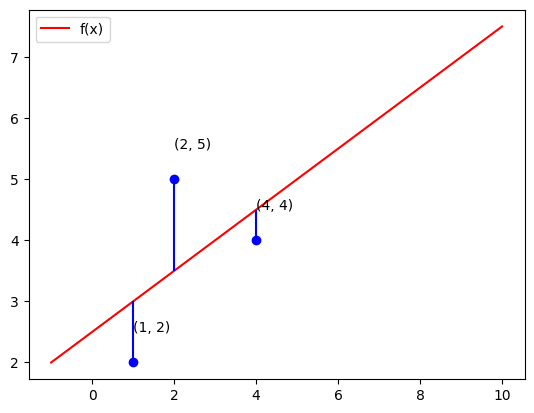

In [27]:
X = lambda x:res[m]*x+res[b]
plot_2d_plane(X, towers)


In [28]:
#Minimum cost
print("Minimum cost for cable :",float(f_cost(res[m],res[b])))

Minimum cost for cable : 3.5


Which is better than our intuition cost 4.75

As discussed before cost function can be anything. But it is good to remember that no matter the type of cost function, ultimately we're just fitting the main line in between the towers such that cost will be minimum, since cost is related to distance, so every cost function gives you the same values for 'm' and 'b'. But it always good to use even squared functions such that we can overcome the bias of canceling the positive and negative distances.

If we keep on increasing the count of tower's our dataset becomes a representation of real world problem. And in machine learning predicting such type of problems would fall in to linear regression model. But in general for fitting the model we use gradient descent algorithm to minimize the cost and for obtaining "m" and "b". Then what about our methods since we followed, what's wrong with them?  
These methods won't work well in the case of dealing with big datasets with multiple features. They become very slow and cost of computations will be very high. In machine learning we call 'm' and 'b' as weights. Sometimes solving for these weights will be very hard and impossible in case of functions like $e^x+log(x)$.

In [29]:
#defining equation
x = symbols("x")
expr = exp(1) ** x + log(x)
expr

exp(x) + log(x)

In [30]:
#solving
dx = diff(expr, x)
solve(dx,x)

[LambertW(-1)]

In [31]:
#loading housing data

housing = pd.read_csv("/Housing.csv")

In [32]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [33]:
#see lot of features for simplicity lets deal with area and price

housing_data = housing[["price","area"]]

In [34]:
housing_data.describe()

,price,area
count,5.450000e+02,545.000000
mean,4.766729e+06,5150.541284
std,1.870440e+06,2170.141023
min,1.750000e+06,1650.000000
25%,3.430000e+06,3600.000000
50%,4.340000e+06,4600.000000
75%,5.740000e+06,6360.000000
max,1.330000e+07,16200.000000


In [35]:
x = housing_data["area"].to_numpy()
y = housing_data["price"].to_numpy()
#print(f"x : {x[:5]}\ny :{y[:5]}")
print(f"Shape of x : {x.shape}")
print(f"Shape of y : {y.shape}")

Shape of x : (545,)
Shape of y : (545,)


Text(0, 0.5, 'Price')

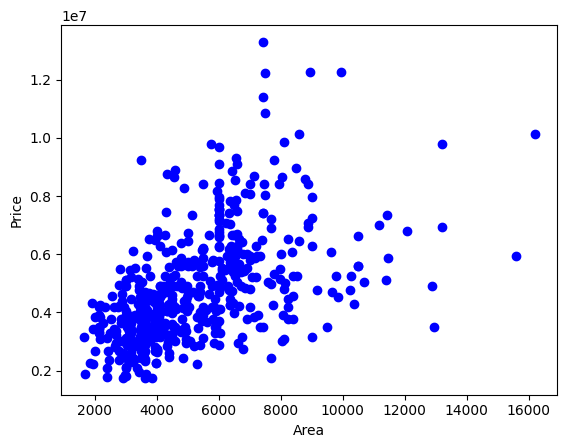

In [36]:
plt.plot(x, y, "bo")
plt.xlabel("Area")
plt.ylabel("Price")

And as above, we plot a line such that we can obtain a mean minimum distance. We are going to use same square function to obtain mean distance.


In [37]:
def plot_data(x, y, w, b):
  f_x = x * w + b
  plt.plot(x, f_x, "r")
  plt.plot(x, y, "bo")
  plt.xlabel("Area")
  plt.ylabel("Prices")

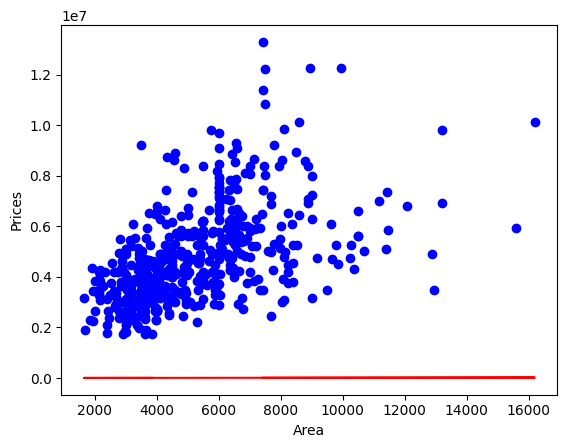

In [38]:
w, b = 1,1
plot_data(x, y, w, b)

In [39]:
#lets fit our model
m,b = symbols("m b")
f_x_sym = x * m + b
cost = sum((f_x_sym - y)**2)/(len(x)*2)
f_cost = lambdify((m,b),cost,"numpy")

In [40]:
dfdm = diff(cost, m)
dfdb = diff(cost, b)
res = solve([dfdm, dfdb],m,b)

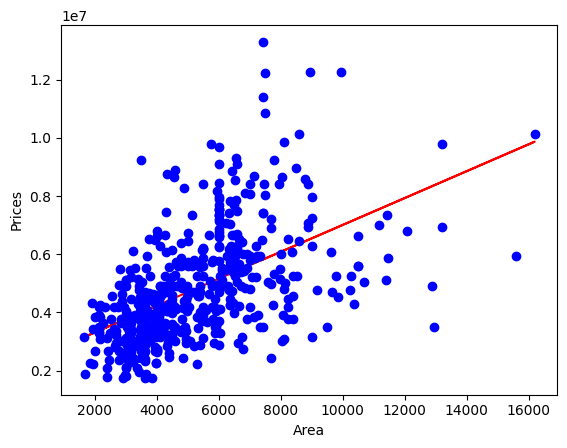

In [41]:
w_diff, b_diff = res[m], res[b]
plot_data(x, y, w_diff, b_diff)

In [42]:
#thats nice we predicted much better
min_cost_diff = float(f_cost(w_diff,b_diff))
print(f"Minimum cost through differentiation: {min_cost_diff}")

Minimum cost through differentiation: 1244430699090.3281


still the cost is too high which means our predictions are far away from the actual prices

##Gradient descent model
Gradient is the measure of how steep a slope is. In machine learning gradient descent means decreasing the value of slope by taking small steps either to left are right based on the best possible location such that the slope at leading step will be minimum than the current position, by iterating same steps over n times we can attain a local minimum point where all the neighbours have greater steepness.  

*Algorithm*

Select random values for weights. Find the derivatives for cost function with respect to all weights, solve for gradients by substituting the values of weights. We use $\alpha$ called learning rate, to control the size of step by scaling down the gradient, (Learning rate is used to avoid divergence from the minimum point). This scaled gradients are then subtracted from the respective weights leading convergence towards minimum point. If gradient is positive we decrease our weights such that steepness will be decreased, If gradient is negative we increae our weights. By repeating above steps we can reach closer to local minimum.

- Gradient descent enables us to reach local minimum much efficiently.
- Learning rate should be perfect (0.01 - 0.1) not much not less, to avoid slowness and divergence.
- Based on our initial weights we get to reach local minimum or global minimum.


In [43]:
def plot_gradient_descent(f, points, costs,w=None, b=None, x_min=0, x_max=10):
  x_p = np.linspace(w_min-10,w_max*2,100)
  if w:
    y_p = np.array([f(x,y, w_x, 0) for w_x in x_p])
    plt.xlabel("w")
  elif b:
    y_p = np.array([f(x,y, 1, b_x) for b_x in x_p])
    plt.xlabel("b")

  plt.ylabel("cost")
  plt.plot(x_p, y_p)
  plt.plot(points[0], costs[0], "bo")

  for i in range(1,len(points[1:])):
    plt.plot(points[i], costs[i], "bo")
    dx = points[i-1]
    dy = costs[i-1]
    plt.annotate('',xy=(points[i],costs[i]),xytext=(dx,dy),arrowprops={"arrowstyle":"->"},)

In [44]:


def cost_function(x, y, w, b):
  return 1/(2*len(y))*np.sum((w*x + b - y)**2)

def dw_dx(x, y, w, b):
  return 1/(len(y)) * np.dot((w*x+b)-y,x)

def db_dx(x, y, w, b):
  return 1/(len(y)) * np.sum((w*x+b)-y)


def gradient_descent(x, y, w, b, alpha=0.1, iters=100):

  costs = {'w' : [], 'b':[], 'cost':[]}
  for i in range(iters):
    grad_dw = dw_dx(x, y, w, b)
    dw = w - alpha * grad_dw
    db = b - alpha * db_dx(x, y, w, b)

    if i%(iters//10) == 0:
      cost = cost_function(x, y, w, b)
      costs['w'].append(w)
      costs['b'].append(b)
      costs['cost'].append(cost)
      print(f"Cost at iteration {i} : {cost}")
    w,b = dw, db

  return w, b, costs


In [45]:
w_grad,b_grad = 1, 1
w_grad, b_grad, costs = gradient_descent(x, y, w_grad, b_grad, alpha = 10**-8, iters=10)

Cost at iteration 0 : 13080204297504.105
Cost at iteration 1 : 7068190193417.088
Cost at iteration 2 : 4224833544713.743
Cost at iteration 3 : 2880080040495.219
Cost at iteration 4 : 2244084556442.006
Cost at iteration 5 : 1943293180959.742
Cost at iteration 6 : 1801035171176.3042
Cost at iteration 7 : 1733754846323.2363
Cost at iteration 8 : 1701934900506.0715
Cost at iteration 9 : 1686885791005.573


In [46]:
w_s = costs["w"]
b_s = costs["b"]
costs_s = costs["cost"]
w_min, w_max = min(w_s), max(w_s)
b_min, b_max = min(w_s), max(w_s)

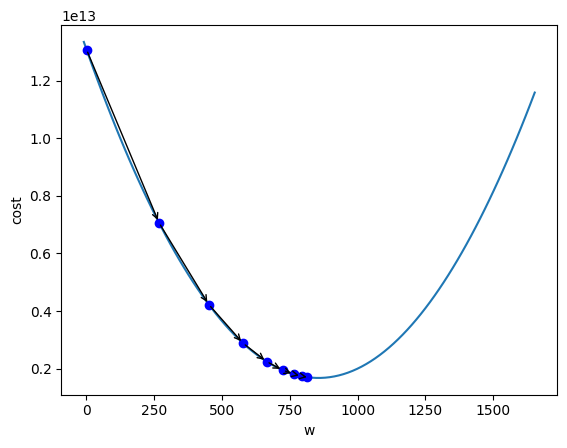

In [47]:
plot_gradient_descent(cost_function, w_s, costs_s, w = True, x_min=w_min, x_max=w_max)

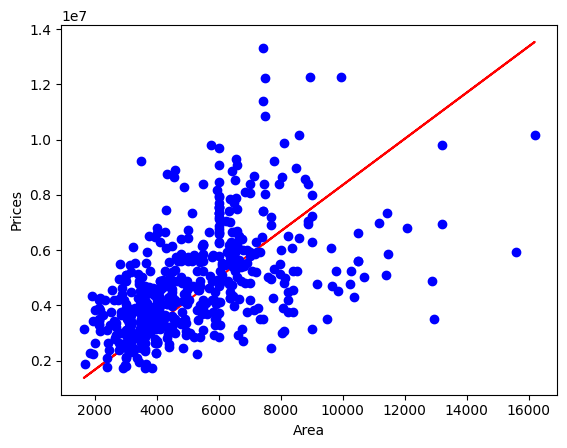

In [48]:
plot_data(x, y, w_grad, b_grad)

In [49]:
min_cost_grad = cost_function(x, y, w_grad, b_grad)
print("Cost through gradient descent :", min_cost_grad)
print("Cost through actual differentiation :", min_cost_diff)

Cost through gradient descent : 1679768377623.599
Cost through actual differentiation : 1244430699090.3281


In [50]:
cost_err = min_cost_grad - min_cost_diff
print("Error between gradient and actual differentiation : ", cost_err)

Error between gradient and actual differentiation :  435337678533.271


In [51]:
x_norm = (x - np.mean(x))/np.std(x)
y_norm = (y - np.mean(y))/np.std(y)

In [52]:
w_grad, b_grad, costs = gradient_descent(x_norm, y_norm, w_grad, b_grad, alpha=0.01,iters=10000)

Cost at iteration 0 : 348571.2717418847
Cost at iteration 1000 : 0.35700307400459286
Cost at iteration 2000 : 0.3563534226606373
Cost at iteration 3000 : 0.35635342265942654
Cost at iteration 4000 : 0.3563534226594266
Cost at iteration 5000 : 0.3563534226594266
Cost at iteration 6000 : 0.3563534226594266
Cost at iteration 7000 : 0.3563534226594266
Cost at iteration 8000 : 0.3563534226594266
Cost at iteration 9000 : 0.3563534226594266


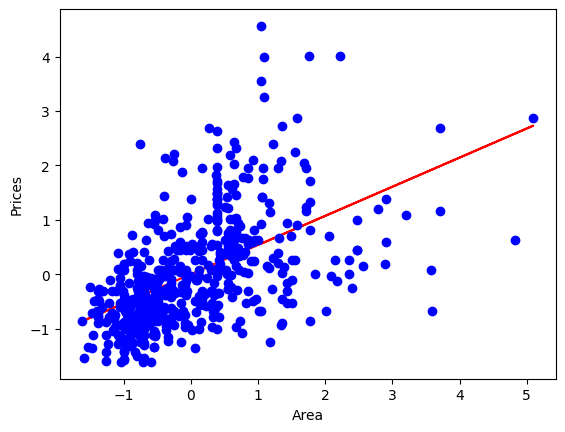

In [53]:
plot_data(x_norm, y_norm, w_grad, b_grad)

In [54]:
min_cost_norm_grad = cost_function(x_norm, y_norm, w_grad, b_grad)
print(min_cost_norm_grad)

0.3563534226594266


In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
train = LinearRegression()
train.fit(x.reshape(-1,1),y)

LinearRegression()

In [57]:
w_l = train.coef_[0]

In [58]:
b_l=train.intercept_

In [60]:
w_grad, b_grad

(0.5359973457780856, 2.772933625564425e-16)

In [61]:
cost_function(x, y, w_l, b_l)

1244430699090.3286

In [ ]:
float(w_diff), float(b_diff)

In [ ]:
w_l, b_l